In [29]:
import DSGRN 
import DSGRN_utils
%run -i 'context.py'

import os
import sys
import math
import pickle

import os
import time
import sys
import galois

In [41]:
# net_spec = """
# X1 :(~X2)
# X2 :(~X1)
# """

net_spec = """
X1 : (~X2)(X1)
X2 : (~X1)(X2)
"""

# net_spec = """
# X2 : (X3)(~X4)
# X3 : (~X2)
# X4 : (X3)"""


# net_spec = """
# Rb : (~CycE)(E2F)
# E2F : (~Rb)(E2F)
# CycE : (E2F)
# """

In [42]:
network = DSGRN.Network(net_spec)
parameter_graph = DSGRN.ParameterGraph(network)
print('Parameter graph has size', parameter_graph.size())

Parameter graph has size 1600


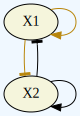

In [43]:
DSGRN.DrawGraph(network)

In [44]:
parameter_graph.size()

1600

In [45]:
param_stability = DSGRN_utils.StabilityQuery(network)

In [46]:
query = GeneralHysteresisQuery(parameter_graph, 3)
matches, cohomology = query.execute()
print(*matches)

Graph matching took 1.58 seconds. Found 24992 graph matches.
Evaluating sheaf criteria on graph match 20486 of 24992.   81% complete.

KeyboardInterrupt: 

In [9]:
import galois
galois.GF2([[1, 1], [0, 1]])

GF([[1, 1],
    [0, 1]], order=2)

In [98]:
class Validated:
    def is_valid(**kwargs):
        raise NotImplementedError("Please implement this method.")

class Test:

    def f(self, x):
        return x*self.num
    
    def __init__(self, num):
        self.num = num


X = Test(5)
B = list(map(X.f, [1,2,3,4]))

any(x==2 for x in range(3,5))

False

In [91]:
g = np.array([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
a = slice(1,3)
b = slice(0,2)
g[1:3,0:2]

array([[4, 5],
       [7, 8]])

In [ ]:
index = 4
parameter = parameter_graph.parameter(index)
level = 3

stg_4 = DSGRN_utils.CubicalBlowupGraph(parameter, level=level)
(scc_dag, graded_complex) = pychomp.FlowGradedComplex(stg_4.complex(), stg_4.adjacencies())
connection_matrix = pychomp.ConnectionMatrix(graded_complex)
morse_graph = DSGRN_utils.MorseGraph(stg_4, scc_dag, graded_complex, connection_matrix, prune_grad=True)

DSGRN_utils.PlotMorseSets(morse_graph, stg_4, graded_complex)

In [ ]:
class Interrupt(Exception):
    pass
    
class EqLandmine:
    def __eq__(self, other):
        raise Interrupt

def blank_stg(parameter_graph):
    parameter = parameter_graph.parameter(0)
    try:
        stg = DSGRN_utils.CubicalBlowupGraph.__new__(DSGRN_utils.CubicalBlowupGraph)
        stg.__init__(parameter, level=EqLandmine())
    except Interrupt:
        pass
    
    stg.digraph.graph_vertices = set(stg.blowup_complex(stg.dim))
    stg.digraph.adjacency_lists = {cell:set() for cell in stg.blowup_complex(stg.dim)}
    return stg

stg = blank_stg(parameter_graph)

(scc_dag, graded_complex) = pychomp.FlowGradedComplex(stg.complex(), stg.adjacencies())
connection_matrix = pychomp.ConnectionMatrix(graded_complex)
morse_graph = DSGRN_utils.MorseGraph(stg, scc_dag, graded_complex, connection_matrix, prune_grad=True)

DSGRN_utils.PlotMorseSets(morse_graph, stg, graded_complex, plot_bdry_cells=False)

In [ ]:
import cProfile
cProfile.run('blank_stg(parameter_graph)', sort='cumtime')

In [ ]:
cProfile.run('DSGRN_utils.CubicalBlowupGraph(parameter, level=0)', sort='cumtime')

In [ ]:
import timeit
import cProfile

In [ ]:
cProfile.run('full_parameter_complex(parameter_graph, dim=2)', sort='cumtime')

In [ ]:
cProfile.run('build_parameter_complex(parameter_graph, dim=2)', sort='cumtime')

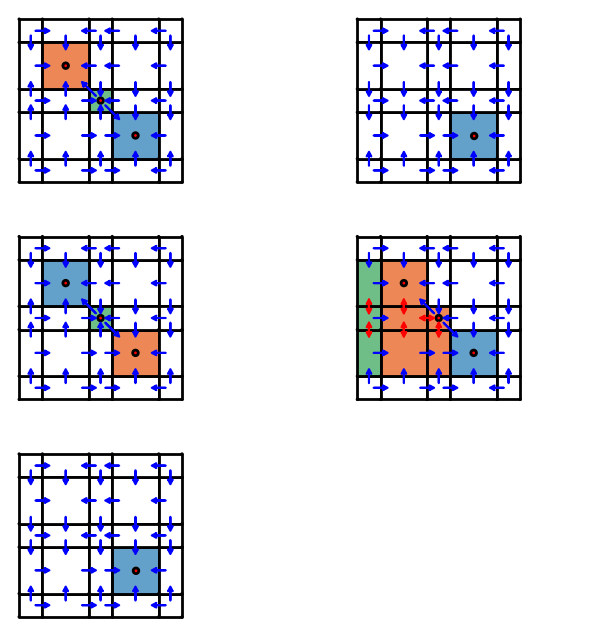

In [13]:
indices = [4, 1]
parameter_complex, stg_dict = build_parameter_complex(parameter_graph, indices, dim=1, length_cap=2)
plot_stg_complex(parameter_complex, stg_dict, top_only=False, plot_bdry_cells=True)
shf = attractor_sheaf(parameter_complex, stg_dict)
morse_dict = morse_dictionary(parameter_complex, stg_dict)


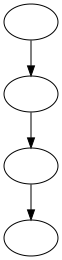

In [14]:
DSGRN.DrawGraph(attractor_sections(shf, morse_dict).children_)

In [15]:
print(sheaf_cohomology(shf))

[[GF([0, 0, 1, 0, 0, 0, 0], order=2), GF([1, 0, 0, 1, 0, 1, 0], order=2), GF([0, 1, 0, 0, 1, 0, 1], order=2)], []]


In [20]:
[len(shf.stalk(cell)) for cell in shf.grading[0]]

[3, 1, 3]

In [ ]:
query = general_hysteresis_query(parameter_graph, 3, param_stability=param_stability)
query.cap = 300
query.shape_matches = [[4, 1, 3], [4, 1, 5]]
results = query.execute()
print(results[0])

In [ ]:
indices = [44, 24, 43]
parameter_complex, stg_dict = full_parameter_complex(parameter_graph, indices, dim=1, length_cap=3)
plot_stg_complex(parameter_complex, stg_dict, top_only=False, labels=True)

In [ ]:
dummy_cell = CechCell(tuple(), 0)

In [ ]:
query = general_hysteresis_query(parameter_graph, length=3, param_stability=param_stability)
query.cap = 100
results = query.execute()
print(results[0])

In [ ]:
vertices = ['a','b','c']

edges = [('a','b'), ('b','c')]

match_grading = {1 : ['a','c'], 2 : ['b']}

coho_criteria = [{
                  'predicate' : lambda sc : len(sc[0]) == 1,
                  'dim' : 1,
                  'clean_stalks' : True
                 }]

In [ ]:
query = BifurcationQuery(parameter_graph, vertices, edges, param_stability, match_grading, coho_criteria)
matches, ordering, coho_list = query.execute()

In [13]:
list({2,4,3})
list({'a','b','d','e'})

['a', 'b', 'd', 'e']

In [ ]:
morse_dict = morse_dictionary(parameter_complex, stg_dict)
att_secs = attractor_sections(shf, morse_dict)
print(att_secs.vertices())
DSGRN.DrawGraph(att_secs.children_)

In [ ]:
sec_morse_graph = pychomp.DirectedAcyclicGraph()
for s in att_secs.vertices():
    if len(att_secs.children(s)) == 1:
        sec_morse_graph.add_vertex(s)
for s1 in sec_morse_graph.vertices():
    for s2 in sec_morse_graph.vertices().intersection(att_secs.descendants(s1)):
        sec_morse_graph.add_edge(s1, s2)
    
sec_morse_graph = sec_morse_graph.transitive_reduction()
DSGRN.DrawGraph(sec_morse_graph)

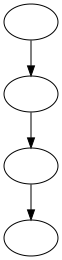

In [18]:
indices = [1,4]
parameter_complex, stg_dict = build_parameter_complex(parameter_graph, indices, dim=1, length_cap=2)
morse_dict = morse_dictionary(parameter_complex, stg_dict)

shf = attractor_sheaf(parameter_complex, stg_dict)
att_secs = attractor_sections(shf, morse_dict)
shf = clean_stalks(shf)

DSGRN.DrawGraph(att_secs.children_)

In [82]:
def clear_empty_axs(axs):
    axs_array = np.array(axs)
    for ax in axs_array.reshape(-1):
        if not ax.lines:
            ax.axis('off')

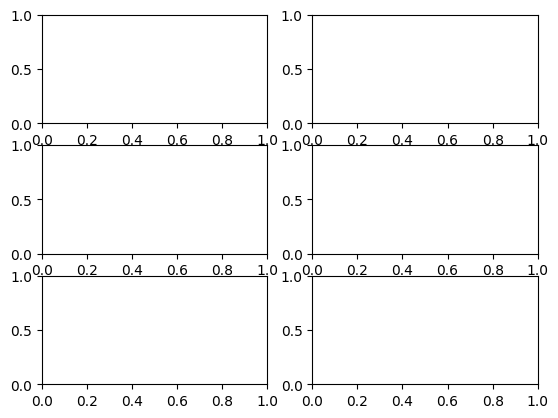

In [84]:
rows = 3
columns = 2
fig, axs = plt.subplots(rows, columns)

In [86]:
stg = CubicalBlowupGraph(parameter_graph.parameter(4))

NameError: name 'CubicalBlowupGraph' is not defined

In [ ]:
################################## ISOLA #########################################


In [ ]:
query = BifurcationQuery(parameter_graph, vertices, edges, param_stability, match_grading, coho_criteria)
matches, ordering, coho_list = query.execute()

In [ ]:
betti_numbers = [tuple(len(basis) for basis in sc[0]) for sc in coho_list]
print(set(betti_numbers))

In [ ]:
index = 0
parameter_complex, stg_dict = full_parameter_complex(parameter_graph, matches[index], dim=1, length_cap=2)
plot_stg_loop(parameter_complex, stg_dict, top_only=False, labels=False, tight=False, prune_grad='none')
print([len(basis) for basis in coho_list[index][0]])

In [ ]:
parameter_complex, stg_dict = full_parameter_complex(parameter_graph, [1, 2, 4, 5], dim=1)
shf = attractor_sheaf(parameter_complex, stg_dict)
sc = sheaf_cohomology(shf)
print([len(betti) for betti in sc])
section = sc[0][2]
print(section)
plot_shf_loop(shf, stg_dict, section=section, top_only=False, labels=True, tight=True)
# plot_stg(stg_dict[list(stg_dict.keys())[0]], morse_nodes=[])

In [ ]:
################################# HYSTERESIS ####################################
vertices = ['a','b','c']

edges = [('a','b'), ('b','c')]

match_grading = {1 : ['a','c'], 2 : ['b']}

coho_criteria = [{
                  'predicate' : lambda sc : len(sc[0]) == 1,
                  'dim' : 1,
                  'clean_stalks' : True
                 }]

In [ ]:
query = BifurcationQuery(parameter_graph, vertices, edges, param_stability, match_grading, coho_criteria)
matches, ordering, coho_list = query.execute()

In [ ]:
betti_numbers = [tuple(len(basis) for basis in sc[0]) for sc in coho_list]
print(set(betti_numbers))

In [ ]:
index = 0
parameter_complex, stg_dict = full_parameter_complex(parameter_graph, matches[index], dim=1, length_cap=2)
plot_stg_complex(parameter_complex, stg_dict, top_only=False, labels=False, tight=False, prune_grad='none')
print([len(basis) for basis in coho_list[index][0]])

In [ ]:
################################# SWALLOWTAIL ######################################

vertices = ['a','b','c','d','e','f','g','h']

edges = [('a','b'),('a','c'),('c','d'),('b','d'),
         ('e','f'),('e','g'),('g','h'),('f','h'),
         ('a','e'),('b','f'),('c','g'),('d','h')]

match_grading = {1 : ['b'], 2 : ['a','c','d','e','f','g'], 3 : ['h']}

coho_criteria = [
                 {'selection' : ['b','d','f','h'],
                  'predicate' : lambda sc : len(sc[0]) == 3 and len(sc[1]) == 3, #two isolas
                  'dim' : 1,
                  'clean_stalks' : True}, 
                 {'selection' : ['a','c','e','g'], 
                  'predicate' : lambda sc : len(sc[0]) == 3 and len(sc[1]) == 3, #stable
                  'dim' : 1,
                  'clean_stalks' : True}, 
                 {'selection' : ['c','d','g','h'], 
                  'predicate' : lambda sc : len(sc[0]) == 3 and len(sc[1]) == 3, #cusp
                  'dim' : 1,
                  'clean_stalks' : True}, 
                 {'selection' : ['e','f','g','h'],
                  'predicate' : lambda sc : len(sc[0]) == 3 and len(sc[1]) == 3, #cusp
                  'dim' : 1,
                  'clean_stalks' : True}, 
                 {'selection' : ['a','b','c','d'],
                  'predicate' : lambda sc : len(sc[0]) == 2 and len(sc[1]) == 2, #isola
                  'dim' : 1,
                  'clean_stalks' : True}, 
                 {'selection' : ['a','b','e','f'], 
                  'predicate' : lambda sc : len(sc[0]) == 2 and len(sc[1]) == 2, #isola
                  'dim' : 1,
                  'clean_stalks' : True}                 
                ]


In [ ]:
query = BifurcationQuery(parameter_graph, vertices, edges, param_stability, match_grading, coho_criteria)
matches, ordering, coho_list = query.execute()

In [ ]:
print([[len(betti) for betti in sc[0]] for sc in coho_list])

In [ ]:
faces = [['b','d','f','h'],
         ['a','c','e','g'],
         ['c','d','g','h'],
         ['e','f','g','h'],
         ['a','b','c','d'],
         ['a','b','e','f']]

In [ ]:
index = 0
match = matches[index]
for face in faces:
    indices = select_from_match(match, face, ordering)
    parameter_complex, stg_dict = full_parameter_complex(parameter_graph, indices, dim=1, length_cap=3)
    #plot_stg_loop(parameter_complex, stg_dict, top_only=False, labels=False, tight=False)
    print([len(basis) for basis in coho_list[index][faces.index(face)]])

In [ ]:
indices = select_from_match(match, faces[5], ordering)
parameter_complex, stg_dict = full_parameter_complex(parameter_graph, indices, dim=1, length_cap=3)

plot_stg_loop(parameter_complex, stg_dict, top_only=False, labels=False, tight=False)
shf = attractor_sheaf(parameter_complex, stg_dict)
sc, delta = sheaf_cohomology(shf, True)
print([len(betti) for betti in sc])

In [ ]:
indices = match
parameter_complex, stg_dict = full_parameter_complex(parameter_graph, indices, dim=2, length_cap=3)
#plot_stg_loop(parameter_complex, stg_dict, top_only=False, labels=True, tight=False)
shf = attractor_sheaf(parameter_complex, stg_dict)
sc, delta = sheaf_cohomology(shf, True)
print([len(betti) for betti in sc])

In [ ]:
print(parameter_complex.vertices())

In [ ]:
print([len([v for v in parameter_complex.vertices() if v[-1]==i]) for i in range(3)])

In [ ]:
top_cells = [v for v in parameter_complex.vertices() if v[-1]==2]
middle_cells = [v for v in parameter_complex.vertices() if v[-1]==1]
bottom_cells = [v for v in parameter_complex.vertices() if v[-1]==0]
crazy_cells = [v for v in parameter_complex.vertices() if any([len(v[i])>2 for i in range(len(v)-1)])]
print([len(parameter_complex.adjacencies(v)) for v in middle_cells])
print([len(parameter_complex.adjacencies(v)) for v in bottom_cells])

In [ ]:
print(*[key_label(key).split("\n")[0]+"\n" for key in crazy_cells])# if len(parameter_complex.adjacencies(key))==3])

In [ ]:
print(*[key_label(key) for key in bottom_cells if len(parameter_complex.adjacencies(key))==3])

In [ ]:
key = crazy_cells[0]
plot_stg(stg_dict[key], prune_grad=False)

In [ ]:
tuple([4,56,2])

In [ ]:
[3,5,7,3,2][:-1]

In [ ]:
print(*[str(permute_key(key))+"\n" for key in crazy_cells])

In [ ]:
R = shf.GF([[0,1,0],[1,1,1]])
R[1,:-1]

In [ ]:
indices = [4]
pc, stg_dict = full_parameter_complex(parameter_graph, indices, 1)
key = ("dummy", 0)
pc.add_edge(key, inequality_key(parameter_graph, 4) + (1,))
stg_dict.update({key : stg_dict[inequality_key(parameter_graph, 
                                               4) + (1,)]})

In [ ]:
print(pc.vertices())

In [ ]:
print([len(b) for b in sheaf_cohomology(attractor_sheaf(pc, stg_dict))])

In [ ]:
def test(h=None):
    if h is None:
        h = 10
        print(h)

In [ ]:
test(1000)

In [ ]:
A = {'selection' : ['b','d','f','h'],
                      'predicate' : lambda sc : len(sc[0]) == 3 
                                                and len(sc[1]) == 3, #bisolas
                      'dim' : 1,
                      'clean_stalks' : True}

In [ ]:
inequality_key(parameter_graph, 4)

In [ ]:
class CechCell:

    def __init__(self, inequality_sets, dim, labels=None):
        self.inequality_sets = inequality_sets
        self.dim = dim
        self.labels = labels

    def __iter__(self):
        return iter(self.inequality_sets)
        
    def __getitem__(self, item):
        return self.inequality_sets[item]

    def __str__(self):
        ineq_strings = [f'Cech cell dimension: {self.dim}\n']
        if self.labels:
            labels = self.labels
        else:
            labels = ['' for ineqs in self]
        for ineqs, label in zip(self, labels):
            if self.labels: ineq_strings.extend([label, " : "])
            ineq_strings.append("{")
            for ineq in ineqs:
                ineq_strings.extend([str(ineq).replace("'",""), ", "])
            ineq_strings[-1] = "}\n"
        ineq_strings[-1] = "}"
        return ''.join(ineq_strings)

    def __eq__(self, other):
        if not isinstance(other, CechCell):
            return False
        return (self.inequality_sets == other.inequality_sets 
                and self.dim == other.dim)

    def __hash__(self):
        return hash(self.inequality_sets + (self.dim,))

    def permute(self):
        if all([len(ineqs) < 3 for ineqs in self]): return self
        new_inequality_sets = []
        for ineqs in self:
            new_inequality_set = set(ineqs)
            for ineq_1, ineq_2 in itertools.combinations(ineqs, 2):
                indexes = [ineq_1.index(a) for a in ineq_2]
                permutation = lambda ineq : tuple(ineq[i] for i in indexes)
                new_inequality_set.update(map(permutation, ineqs))     
            new_inequality_sets.append(frozenset(new_inequality_set))
        return CechCell(tuple(new_inequality_sets), self.dim, self.labels)

    def join(self, others, dim=None):
        if dim is None:
            dim = self.dim - len(others)
        if not others: return self
        other_ineq_sets = tuple(zip(*[other.inequality_sets 
                                     for other in others]))
        all_ineq_sets = tuple(zip(self.inequality_sets, other_ineq_sets))
        new_ineq_sets = tuple(ineqs.union(*other_ineqs) 
                                    for ineqs, other_ineqs in all_ineq_sets)
        return CechCell(new_ineq_sets, dim, self.labels)

    def get_parent_cells(self):
        parent_cells = []
        for d, ineqs in enumerate(self):
            if len(ineqs) == 1:
                continue
            for ineq in ineqs:
                new_ineq_sets = (self.inequality_sets[:d] 
                                  + (ineqs.difference({ineq}),) 
                                  + self.inequality_sets[d+1:])
                parent = CechCell(new_ineq_sets, self.dim + 1, self.labels)
                parent_cells.append(parent)
        return parent_cells

    def get_parent_parameters(self, parameter_graph):
        index = lambda p : DSGRN.index_from_partial_orders(parameter_graph, p)
        partial_orders = [[str(ineq).replace("'","") for ineq in ineqs] 
                          for ineqs in itertools.product(*self.inequality_sets)]
        return list(map(get_index, partial_orders))

def cech_top_cell(parameter_graph, index, dim=0):
    """ Inputs a DSGRN parameter graph and an index in that graph. Outputs a
        (hashable) key for the inequalities of that parameter region."""

    lines = parameter_graph.parameter(index).partialorders().split("\n")
    colons = [line.index(":") for line in lines]
    
    inequality_sets = tuple(frozenset({tuple(line[i+3:-1].split(", "))})
                            for line, i in zip(lines, colons))
    labels = tuple(line[:i-1] for line, i in zip(lines, colons))
    
    return CechCell(inequality_sets, dim, labels)

In [ ]:
key = CechCell((frozenset({('a','b','c'),('a','c','b'),('b','a','c')}),), 3, ['X1'])
print(key)
print(key.permute())

In [ ]:
key_4 = cech_top_cell(parameter_graph, 4, 2)
key_1 = cech_top_cell(parameter_graph, 1, 2)
key_3 = cech_top_cell(parameter_graph, 3, 2)

key = key_4.join([key_1])#cech_top_cell(parameter_graph, i, dim=2) for i in []])


In [ ]:
print(key.get_parent_parameters(parameter_graph))

In [ ]:
A = ['abc','efg']
B = [2, 1]
AB = zip(A,B)
print([s[:i] for s, i in AB])

In [ ]:
p = parameter_graph.parameter(4)
print([s[5:] for s in p.partialorders().split('\n')])
DSGRN.index_from_partial_orders(parameter_graph, [s[5:] for s in p.partialorders().split('\n')])

In [ ]:
get_index = lambda p : DSGRN.index_from_partial_orders(parameter_graph, p)
partial_orders = [[str(ineq).replace("'","") for ineq in ineqs] for ineqs in itertools.product(*key.inequality_sets)]
results = map(get_index, partial_orders)
print(list(results))

In [ ]:
[[str(ineq).replace("'","") for ineq in ineqs] for ineqs in itertools.product(*key.inequality_sets)]

In [ ]:
def waste(k):
    p = 0
    for i in range(200):
        p += i
    return k

In [ ]:
timeit.timeit(lambda: any([len({a for a in D})>5 for D in [A, B, C]]))

In [ ]:
timeit.timeit(lambda: any(len({a for a in D})>5 for D in [A, B, C]))

In [ ]:
parameter_graph.adjacencies(4, "codim1")

In [ ]:
A = {1 : 3, 4 : 5, 7 : 2}

In [ ]:
any(i==8 for i in range(5))

In [ ]:
A = {1, 2, 3, 4}
B = {1, 2, 3}
C = {1, 2, 3, 4, 5}

In [ ]:
A = []
A.extend([])
print(A)

In [21]:
def A():
    yield from (2, 4)
    yield 3


In [22]:
a, b, c = A()
print(b)

4
